In [1]:
import requests
import json
import pandas as pd
import hashlib
from pathlib import Path
from string import Template
from os.path import exists
import matplotlib.pyplot as plt

# Create dataset DOI groups

In [2]:
doi_groups = {}

In [3]:
dois = {"https://doi.org/10.1007/s11224-021-01869-w",
       "https://doi.org/10.1111/risa.12109",
       "https://doi.org/10.1080/17435390.2019.1595206",
       "https://doi.org/10.3390/nano10102017",
       "https://doi.org/10.1021/acs.chemrestox.7b00303",
       "https://doi.org/10.1016/j.chemosphere.2018.11.014",
       "https://doi.org/10.1038/s41598-018-24483-z",
       "https://doi.org/10.4018/IJQSPR.20201001.oa2",
       "https://doi.org/10.1021/acs.est.8b02757",
       "https://doi.org/10.3762/bjnano.6.192",
       "https://doi.org/10.1021/nn406018q",
       "https://doi.org/10.1080/17435390.2016.1278481",
       "https://doi.org/10.3390/ijms21155280",
       "https://doi.org/10.1073/pnas.1919755117",
       "https://doi.org/10.1021/acsnano.8b07562",
       "https://doi.org/10.1002/smll.201900510",
       "https://doi.org/10.1039/D0EN01240H",
       "https://doi.org/10.1016/j.impact.2021.100298",
       "https://doi.org/10.1289/EHP6508",
       "https://doi.org/10.1038/s41467-020-16413-3"}
doi_groups["Toxicological Datasets"] = dois

In [4]:
dois = {"https://doi.org/10.1039/C4NR01285B",
       "https://doi.org/10.1016/j.chemosphere.2019.125489",
       "https://doi.org/10.1016/j.envint.2014.08.009",
       "https://doi.org/10.1021/es503861x",
       "https://doi.org/10.1080/17435390.2017.1379567"}
doi_groups["Perturbation Datasets"] = dois

In [5]:
dois = {"https://doi.org/10.1016/j.impact.2021.100308",
       "https://doi.org/10.1080/15363830701779315",
       "https://doi.org/10.1039/C9NH00060G",
       "https://doi.org/10.1021/acs.jpcc.0c01195",
       "https://doi.org/10.3390/nano11071774"}
doi_groups["PhysChem & Functionality Datasets"] = dois

In [6]:
dois = {"https://doi.org/10.1016/j.fct.2017.08.008",
       "https://doi.org/10.1016/j.chemosphere.2021.131452",
       "https://doi.org/10.1080/17435390.2021.1872113",
       "https://doi.org/10.1021/acs.est.1c01603"}
doi_groups["Environmetal Datasets"] = dois

In [7]:
doi_groups

{'Toxicological Datasets': {'https://doi.org/10.1002/smll.201900510',
  'https://doi.org/10.1007/s11224-021-01869-w',
  'https://doi.org/10.1016/j.chemosphere.2018.11.014',
  'https://doi.org/10.1016/j.impact.2021.100298',
  'https://doi.org/10.1021/acs.chemrestox.7b00303',
  'https://doi.org/10.1021/acs.est.8b02757',
  'https://doi.org/10.1021/acsnano.8b07562',
  'https://doi.org/10.1021/nn406018q',
  'https://doi.org/10.1038/s41467-020-16413-3',
  'https://doi.org/10.1038/s41598-018-24483-z',
  'https://doi.org/10.1039/D0EN01240H',
  'https://doi.org/10.1073/pnas.1919755117',
  'https://doi.org/10.1080/17435390.2016.1278481',
  'https://doi.org/10.1080/17435390.2019.1595206',
  'https://doi.org/10.1111/risa.12109',
  'https://doi.org/10.1289/EHP6508',
  'https://doi.org/10.3390/ijms21155280',
  'https://doi.org/10.3390/nano10102017',
  'https://doi.org/10.3762/bjnano.6.192',
  'https://doi.org/10.4018/IJQSPR.20201001.oa2'},
 'Perturbation Datasets': {'https://doi.org/10.1016/j.chemos

# Fetch articles information as JSON from DOIs

In [10]:
list_of_articles = []

counter = 0

for group_key in doi_groups:
    
    dois = doi_groups[group_key]
        
    for doi in dois:
                    
        template = Path('template.md').read_text()
        template = Template(template)
        
        counter = counter + 1
        print(counter)
   
        article = dict()
        article["group_key"] = group_key
        article["DOI"] = ""
        article["hash"] = ""
        article["title"] = ""
        article["journal"] = ""
        article["dateOfPublish-year"] = ""
        article["dateOfPublish-month"] = ""
        article["dateOfPublish-day"] = ""
        article["authors"] = ""
        article["link"] = ""
        article["license"] = ""
        article["subject"] = ""
        article["type"] = ""
                
        headers = {
            'Accept': 'application/json'
        }

        response = requests.request("GET", doi, headers=headers, data="")

        r_text = response.text
        try:
            r_json = json.loads(r_text)
        except Exception:
            print("error happened")
            r_json = {}
            
        # DOI
        # Title
        # journal
        # date (issued or created or published)
        # authors
        # link
        # subject
        
        
        if("DOI" in r_json):
            article["DOI"] = r_json["DOI"]
        
        if("title" in r_json):
            article["title"] = r_json["title"]

        if("container-title" in r_json):
            article["journal"] = r_json["container-title"]
            
        if("type" in r_json):
            article["type"] = r_json["type"]

        if("subject" in r_json):
            article["subject"] += ",".join(r_json["subject"])
              
        if("license" in r_json):
            article["license"] = r_json["license"][0]['URL']
              
        if("link" in r_json):
            if(r_json["link"][0]['content-type'] == "application/pdf"):
                article["link"] = r_json["link"][0]['URL']
                
        datePublished = ""
        
        if("issued" in r_json):
            
            article["dateOfPublish-year"] = str(r_json["issued"]["date-parts"][0][0])  
            datePublished += article["dateOfPublish-year"]
            
            if(len(r_json["issued"]["date-parts"][0]) > 1):
                
                article["dateOfPublish-month"] = str(r_json["issued"]["date-parts"][0][1])
                datePublished += "-"+article["dateOfPublish-month"]
                
            if(len(r_json["issued"]["date-parts"][0]) > 2):
                
                article["dateOfPublish-day"] = str(r_json["issued"]["date-parts"][0][2])
                datePublished += "-"+article["dateOfPublish-day"]
                
        elif("created" in r_json):

            article["dateOfPublish-year"] = str(r_json["created"]["date-parts"][0][0])
            datePublished += article["dateOfPublish-year"]

            if(len(r_json["issued"]["date-parts"][0]) > 1):
                
                article["dateOfPublish-month"] = str(r_json["created"]["date-parts"][0][1])
                datePublished += "-"+article["dateOfPublish-month"]
                
            if(len(r_json["issued"]["date-parts"][0]) > 2):
                
                article["dateOfPublish-day"] = str(r_json["created"]["date-parts"][0][2])
                datePublished += "-"+article["dateOfPublish-day"]
                
        elif("published" in r_json):

            article["dateOfPublish-year"] = str(r_json["created"]["date-parts"][0][0])
            datePublished += article["dateOfPublish-year"]
            
            if(len(r_json["issued"]["date-parts"][0]) > 1):
                
                article["dateOfPublish-month"] = str(r_json["published"]["date-parts"][0][1])
                datePublished += "-"+article["dateOfPublish-month"]
                
            if(len(r_json["issued"]["date-parts"][0]) > 2):
                
                article["dateOfPublish-day"] = str(r_json["published"]["date-parts"][0][2])
                datePublished += "-"+article["dateOfPublish-day"]

        if("license" in r_json):
            print(doi + " ------> " + r_json['license'][0]['URL'])
            
        if("author" in r_json):
            authors = list()
            
            for a in r_json["author"]:
                authors.append(a["given"] + " " + a["family"])
                
            article["authors"] = ", ".join(authors)

        fullHash = hashlib.md5(article["DOI"].encode('utf-8')).hexdigest()
        
        print(article["DOI"] + " - " + doi + " - " + fullHash[0:10])
        
        article["hash"] = fullHash
        
        if(not exists('json/'+fullHash[0:10]+'.json') and len(r_json) != 0):
            with open('json/'+fullHash[0:10]+'.json', 'w', encoding='utf-8') as f:
                json.dump(r_json, f, ensure_ascii=False, indent=4)

        list_of_articles.append(list(article.values()))
        
        if(article["link"].strip() == "" and "URL" in r_json):
            article["link"] = r_json["URL"]
        
        template = template.safe_substitute(
            group=article["group_key"],
            doi=article["DOI"],
            link=article["link"],
            license=article["license"],
            subject=article["subject"],
            aType=article["type"],
            title=article["title"],
            journal=article["journal"],
            year=article["dateOfPublish-year"],
            datePublished=datePublished,
            authors=article["authors"]
        )

        with open('overview/'+fullHash[0:10]+'.md', 'w') as f:
            f.write(str(template))
                


1
https://doi.org/10.1073/pnas.1919755117 ------> https://creativecommons.org/licenses/by-nc-nd/4.0/
10.1073/pnas.1919755117 - https://doi.org/10.1073/pnas.1919755117 - 9e1d426c90
2
10.1289/ehp6508 - https://doi.org/10.1289/EHP6508 - 9a9ad3fe96
3
https://doi.org/10.1038/s41598-018-24483-z ------> https://creativecommons.org/licenses/by/4.0
10.1038/s41598-018-24483-z - https://doi.org/10.1038/s41598-018-24483-z - 1687649488
4
https://doi.org/10.3390/nano10102017 ------> https://creativecommons.org/licenses/by/4.0/
10.3390/nano10102017 - https://doi.org/10.3390/nano10102017 - 5d2e680699
5
https://doi.org/10.1002/smll.201900510 ------> http://onlinelibrary.wiley.com/termsAndConditions#am
10.1002/smll.201900510 - https://doi.org/10.1002/smll.201900510 - 0a77bd4afd
6
10.1021/acs.est.8b02757 - https://doi.org/10.1021/acs.est.8b02757 - 51cbf2d4ae
7
https://doi.org/10.1080/17435390.2019.1595206 ------> http://creativecommons.org/licenses/by-nc-nd/4.0/
10.1080/17435390.2019.1595206 - https://do

In [16]:
len(list_of_articles)

34

# Create dataset description dataframe

In [153]:
dataset_desc = pd.DataFrame(list_of_articles, 
                  columns = ['group_key','DOI', 'hash', 'title', 'journal', 'dateOfPublish-year', 'dateOfPublish-month', 
                            'dateOfPublish-day', 'authors', 'link', 'license', 'subject', 'type'])
 
dataset_desc.shape

(34, 13)

In [154]:
dataset_desc.head()

,group_key,DOI,hash,title,journal,dateOfPublish-year,dateOfPublish-month,dateOfPublish-day,authors,link,license,subject,type
0,Toxicological Datasets,10.1073/pnas.1919755117,9e1d426c9015fc15d718b0fbd3f41152,Machine learning predicts the functional compo...,Proceedings of the National Academy of Sciences,2020,4,24,"Zhan Ban, Peng Yuan, Fubo Yu, Ting Peng, Qixin...",,https://creativecommons.org/licenses/by-nc-nd/...,Multidisciplinary,journal-article
1,Toxicological Datasets,10.1289/ehp6508,9a9ad3fe96432ca53a6ad331a5283ea6,Quantitative Structure–Activity Relationship M...,Environmental Health Perspectives,2020,6,,"Yang Huang, Xuehua Li, Shujuan Xu, Huizhen Zhe...",,,"Health, Toxicology and Mutagenesis,Public Heal...",journal-article
2,Toxicological Datasets,10.1038/s41598-018-24483-z,16876494884cd452d29ad6455ab7e4dc,Towards a generalized toxicity prediction mode...,Scientific Reports,2018,4,17,"Jang-Sik Choi, My Kieu Ha, Tung Xuan Trinh, Ta...",http://www.nature.com/articles/s41598-018-2448...,https://creativecommons.org/licenses/by/4.0,Multidisciplinary,journal-article
3,Toxicological Datasets,10.3390/nano10102017,5d2e680699dcb1d8ec6ee07941653774,Predicting Cytotoxicity of Metal Oxide Nanopar...,Nanomaterials,2020,10,13,"Anastasios G. Papadiamantis, Jaak Jänes, Evang...",,https://creativecommons.org/licenses/by/4.0/,"General Materials Science,General Chemical Eng...",journal-article
4,Toxicological Datasets,10.1002/smll.201900510,0a77bd4afd69252e1fa0b8f3e52c1100,Bayesian Network Resource for Meta‐Analysis: C...,Small,2019,6,17,"Muhammad Bilal, Eunkeu Oh, Rong Liu, Joyce C. ...",https://api.wiley.com/onlinelibrary/tdm/v1/art...,http://onlinelibrary.wiley.com/termsAndConditi...,"Biomaterials,Biotechnology,General Materials S...",journal-article


In [ ]:
dataset_desc.to_csv("output/dataset_description.tsv", sep="\t", encoding="utf-8", index=False)

#### NOTE: after saving the dataframe to TSV, it was manually inspected to fill the field where information could not be obtained from the DOI JSON object (e.g. license URL)

In [85]:
dataset_desc = pd.read_csv("output/dataset_description.tsv", sep="\t", encoding="utf-8")

In [86]:
dataset_desc.head()

,group_key,DOI,hash,title,journal,dateOfPublish-year,dateOfPublish-month,dateOfPublish-day,authors,link,license,subject,type
0,Toxicological Datasets,10.1073/pnas.1919755117,9e1d426c9015fc15d718b0fbd3f41152,Machine learning predicts the functional compo...,Proceedings of the National Academy of Sciences,2020,4.0,24.0,"Zhan Ban, Peng Yuan, Fubo Yu, Ting Peng, Qixin...",NaN,https://creativecommons.org/licenses/by-nc-nd/...,Multidisciplinary,journal-article
1,Toxicological Datasets,10.1289/ehp6508,9a9ad3fe96432ca53a6ad331a5283ea6,Quantitative Structure–Activity Relationship M...,Environmental Health Perspectives,2020,6.0,NaN,"Yang Huang, Xuehua Li, Shujuan Xu, Huizhen Zhe...",NaN,https://ehp.niehs.nih.gov/about-ehp/license,"Health, Toxicology and Mutagenesis,Public Heal...",journal-article
2,Toxicological Datasets,10.1038/s41598-018-24483-z,16876494884cd452d29ad6455ab7e4dc,Towards a generalized toxicity prediction mode...,Scientific Reports,2018,4.0,17.0,"Jang-Sik Choi, My Kieu Ha, Tung Xuan Trinh, Ta...",http://www.nature.com/articles/s41598-018-2448...,https://creativecommons.org/licenses/by/4.0,Multidisciplinary,journal-article
3,Toxicological Datasets,10.3390/nano10102017,5d2e680699dcb1d8ec6ee07941653774,Predicting Cytotoxicity of Metal Oxide Nanopar...,Nanomaterials,2020,10.0,13.0,"Anastasios G. Papadiamantis, Jaak Jänes, Evang...",NaN,https://creativecommons.org/licenses/by/4.0/,"General Materials Science,General Chemical Eng...",journal-article
4,Toxicological Datasets,10.1002/smll.201900510,0a77bd4afd69252e1fa0b8f3e52c1100,Bayesian Network Resource for Meta‐Analysis: C...,Small,2019,6.0,17.0,"Muhammad Bilal, Eunkeu Oh, Rong Liu, Joyce C. ...",https://api.wiley.com/onlinelibrary/tdm/v1/art...,http://onlinelibrary.wiley.com/termsAndConditi...,"Biomaterials,Biotechnology,General Materials S...",journal-article


# Dataset Analysis

In [87]:
dataset_mi_matrix = pd.read_csv("output/dataset_mi_matrix.tsv", sep="\t", encoding="utf-8")

In [88]:
dataset_mi_matrix = dataset_mi_matrix.fillna('N')

In [89]:
dataset_mi_matrix.head()

,hash,chemical composition,surface chemistry/coating/functionalization,purity,nanomaterial labeling/identity,nanomaterial source,size,shape,surface area,surface charge,...,data analysis methods,organism/species,method/route of administration,in vivo - number of test subjects,in vivo - subject weight,in vivo - subject age,in vivo - subject sex,in vivo - subject strain,in vitro - passage number,in vitro - cell mycoplasma testing
0,9e1d426c9015fc15d718b0fbd3f41152,Y,Y,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
1,9a9ad3fe96432ca53a6ad331a5283ea6,Y,N,N,N,N,Y,Y,N,N,...,N,N,N,N,N,N,N,N,N,N
2,16876494884cd452d29ad6455ab7e4dc,Y,N,N,N,N,Y,N,Y,Y,...,N,Y,N,N,N,N,N,N,N,N
3,5d2e680699dcb1d8ec6ee07941653774,Y,N,N,N,N,Y,N,Y,Y,...,N,Y,N,N,N,N,N,N,N,N
4,0a77bd4afd69252e1fa0b8f3e52c1100,Y,N,N,N,N,Y,N,Y,Y,...,N,Y,N,N,N,N,N,N,N,N


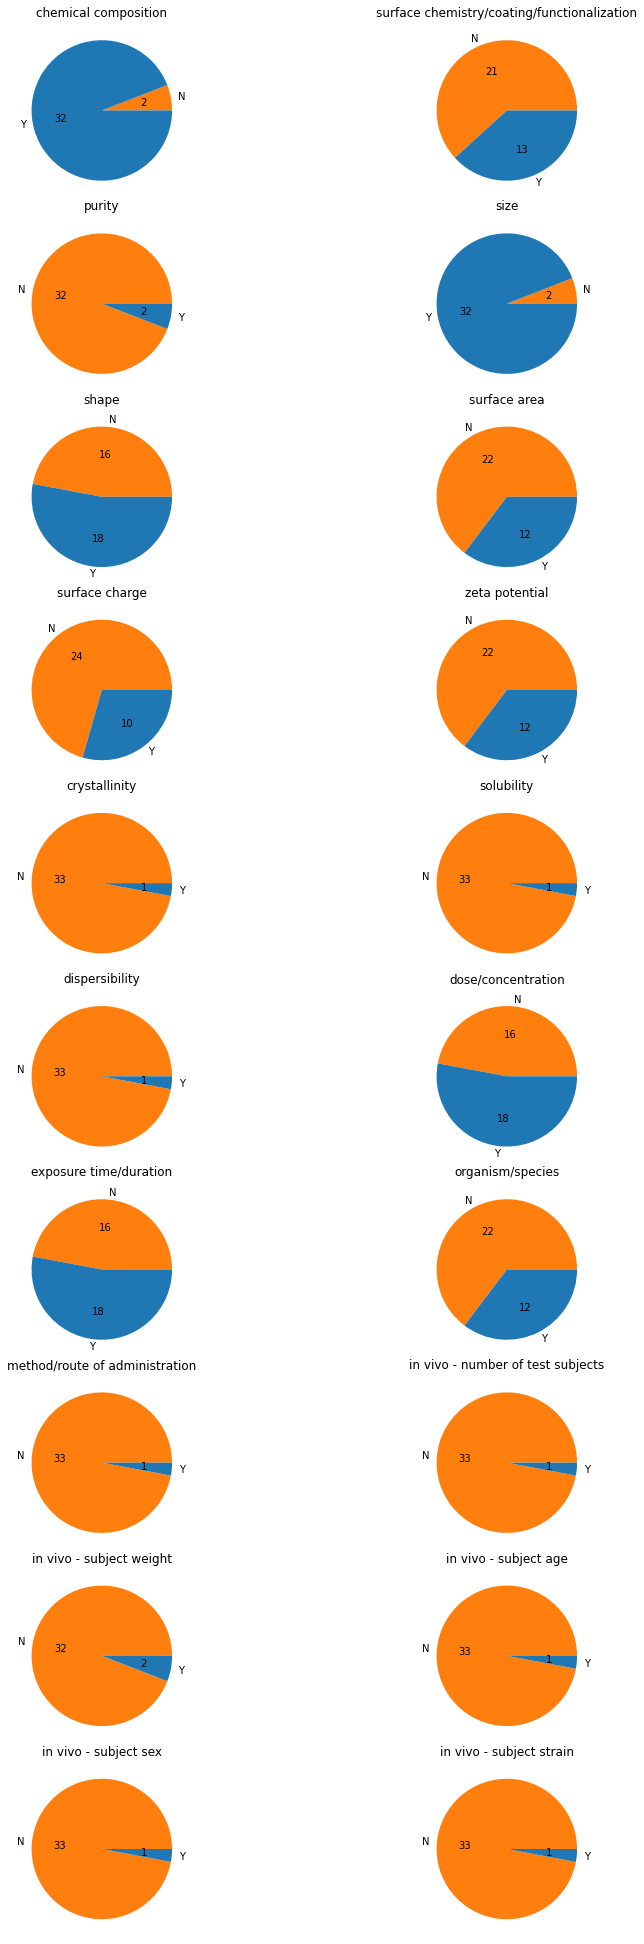

In [90]:
plt.rcParams['figure.figsize'] = [20, 20]

left  = 0.125
right = 0.3
bottom = 0.1
top = 0.9
wspace = 0.8
hspace = 0.1

colorsDict = {'Y': '#FF7F0E', 'N': '#1F77B4'}

index = 1

total = dataset_mi_matrix.shape[0]

def format_autopct(x):
    #return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
    return '{:.0f}'.format(total*x/100)

plt.figure()

for i in range(1,30):
    if(len(dataset_mi_matrix.iloc[:, i].value_counts().sort_index()) == 2):
        
        plt.subplot(15,2,index)
        
        index = index + 1
        
        colorsArr = [colorsDict['Y'],colorsDict['N']]
        labelsArr = ['Y','N']
      
        plt.subplots_adjust(left, bottom, right, top, wspace, hspace)
        dataset_mi_matrix.iloc[:, i].value_counts().sort_index().plot(kind='pie', autopct=format_autopct, colors=colorsArr, label="", figsize=(50, 50), title=dataset_mi_matrix.columns[i])


In [91]:
def getMiAppMappingDict():
    with open('mapping.json', 'r') as f:
        miAppMapping = json.loads(f.read())
        
    app_mi_mapping = dict()
    app_mi_mapping["Grouping/Read-across"] = set()
    app_mi_mapping["Nanoform Identification"] = set()
    app_mi_mapping["Toxicity Prediction"] = set()
    app_mi_mapping["Regulatory requirements"] = set()
    app_mi_mapping["NanoInChI Calculation"] = set() 
    
    for mi in miAppMapping['abstractMIs']:
        for app in mi["related_applications"]:
            app_mi_mapping[app["name"]].add(mi["name"])
            
    return app_mi_mapping

In [92]:
def getDatasetsApplicationAnnotation(dataset_mi_matrix):
    with open('mapping.json', 'r') as f:
        miAppMapping = json.loads(f.read())
    
    dataset_app_list = dict()
    
    for i, row in dataset_mi_matrix.iterrows():
    
        dataset_app_list[row['hash']] = dict()
        dataset_app_list[row['hash']]["Grouping/Read-across"] = set()
        dataset_app_list[row['hash']]["Nanoform Identification"] = set()
        dataset_app_list[row['hash']]["Toxicity Prediction"] = set()
        dataset_app_list[row['hash']]["Regulatory requirements"] = set()
        dataset_app_list[row['hash']]["NanoInChI Calculation"] = set()

        for i in range(1,31):
            if(row[dataset_mi_matrix.columns[i]] == 'Y'):
                for mi in miAppMapping['abstractMIs']:
                    for app in mi["related_applications"]:
                        if(dataset_mi_matrix.columns[i] in app_mi_mapping[app["name"]]):
                            dataset_app_list[row['hash']][app["name"]].add(dataset_mi_matrix.columns[i])
    
    return dataset_app_list

In [93]:
def applicationAssessmentByDatasetHash(dsHash):
    
    data = dict()

    for i in range(0,len(dataset_app_list[dsHash])):
        app_name = list(dataset_app_list[dsHash])[i]
        app_total = len(list(app_mi_mapping[app_name]))
        app_count = len(list(dataset_app_list[dsHash].values())[i])
        data[app_name] = app_count/app_total
        
    return data

In [182]:
def plotDatasetApplicationAssessment(dsHash):
    
    data = applicationAssessmentByDatasetHash(dsHash)
    apps = list(data.keys())
    values = list(data.values())

    fig = plt.figure(figsize = (12, 5))

    plt.bar(apps, values, color ='maroon', width = 0.4)

    plt.xlabel("Reusability applications")
    plt.ylabel("Coverage percentage")
    plt.ylim(0.0, 1.1)
    plt.title(dataset_desc[dataset_desc.hash == dsHash].iloc[0]["title"][0:100]+" ...")
    plt.show()

In [95]:
app_mi_mapping = getMiAppMappingDict()

In [96]:
dataset_app_list = getDatasetsApplicationAnnotation(dataset_mi_matrix)

In [97]:
app_mi_mapping["NanoInChI Calculation"]

{'chemical composition', 'crystallinity', 'shape', 'size'}

In [98]:
len(dataset_app_list)

34

In [99]:
dataset_app_list["9e1d426c9015fc15d718b0fbd3f41152"]

{'Grouping/Read-across': {'chemical composition',
  'shape',
  'size',
  'surface chemistry/coating/functionalization',
  'zeta potential'},
 'Nanoform Identification': {'chemical composition',
  'shape',
  'size',
  'surface chemistry/coating/functionalization'},
 'Toxicity Prediction': {'chemical composition',
  'shape',
  'size',
  'surface chemistry/coating/functionalization',
  'zeta potential'},
 'Regulatory requirements': {'chemical composition',
  'size',
  'surface chemistry/coating/functionalization',
  'zeta potential'},
 'NanoInChI Calculation': {'chemical composition', 'shape', 'size'}}

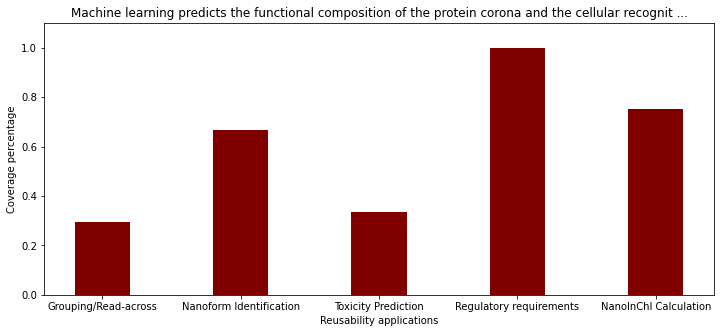

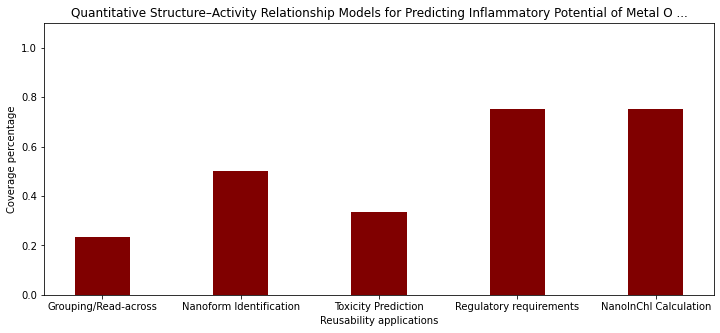

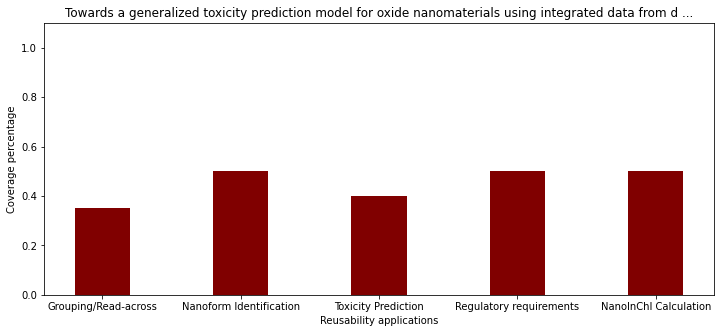

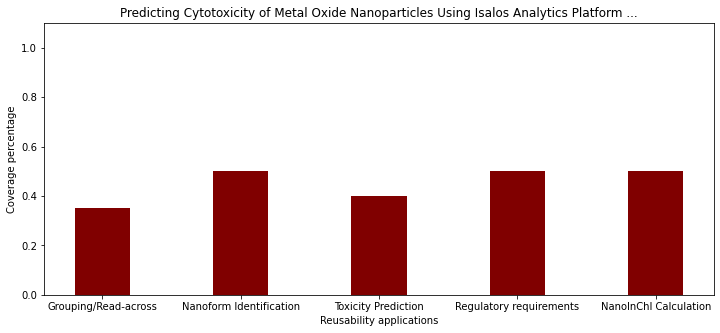

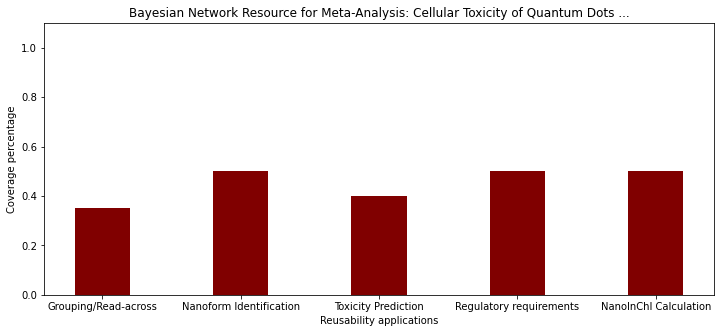

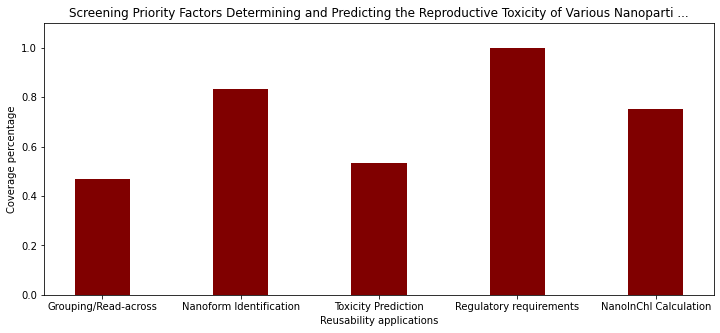

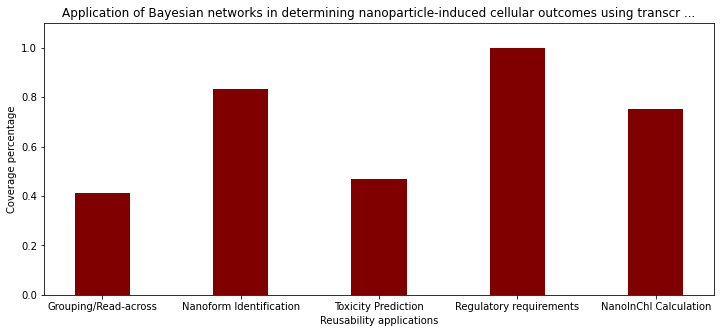

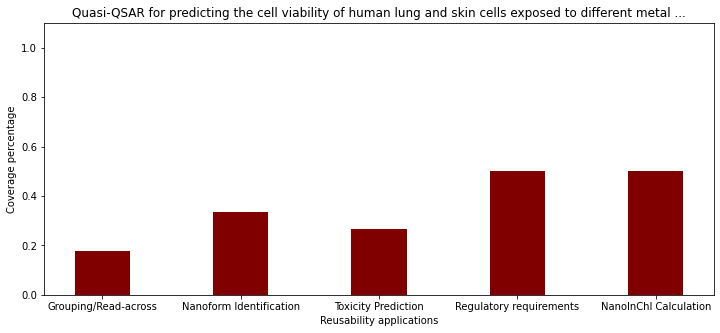

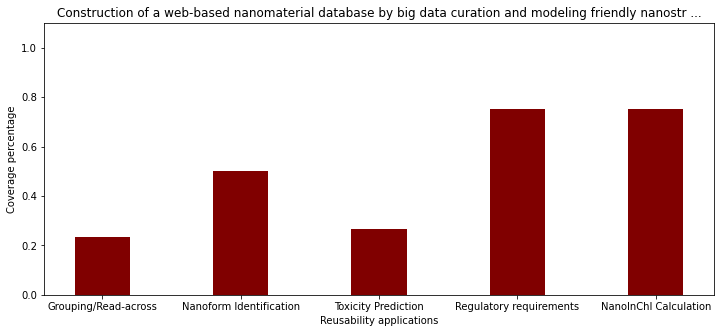

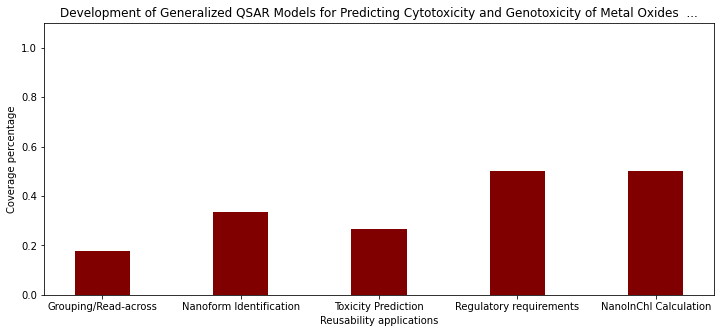

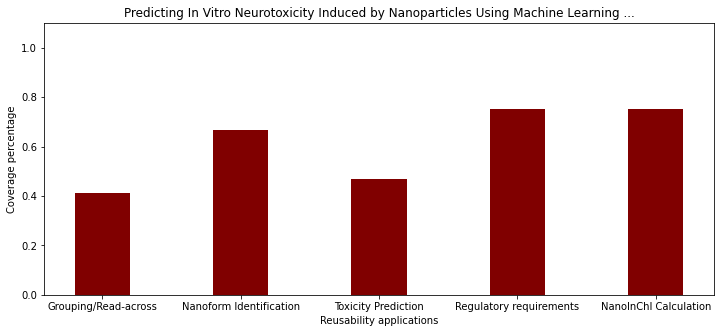

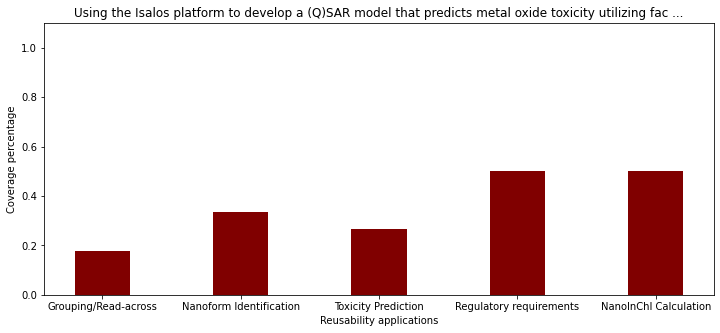

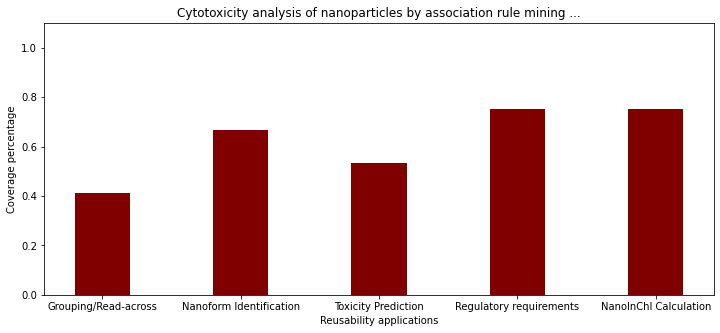

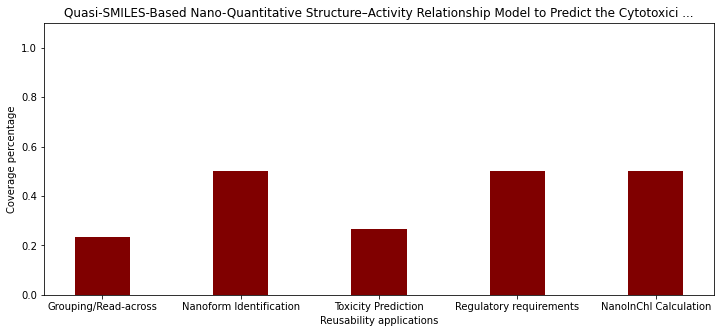

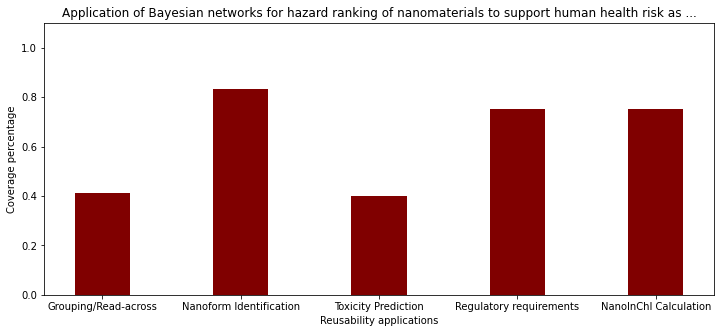

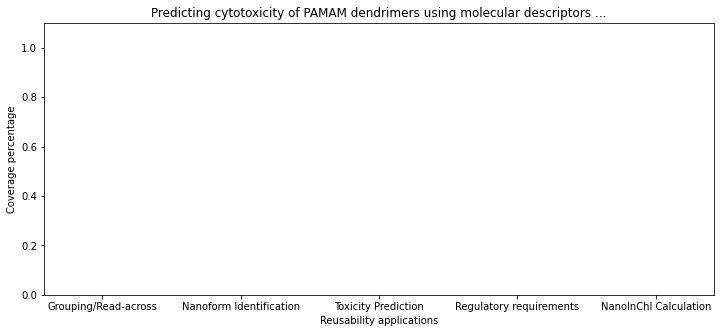

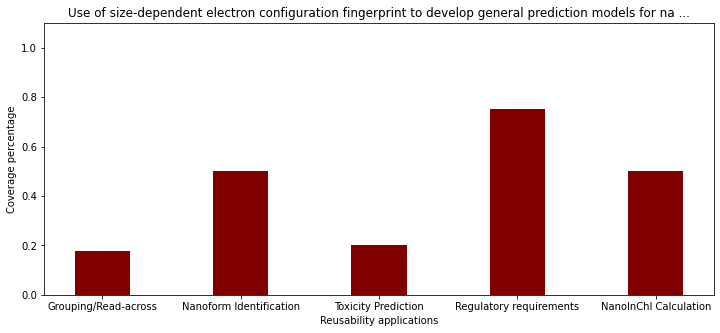

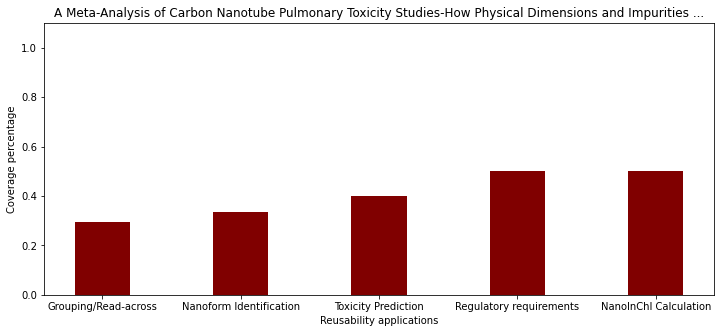

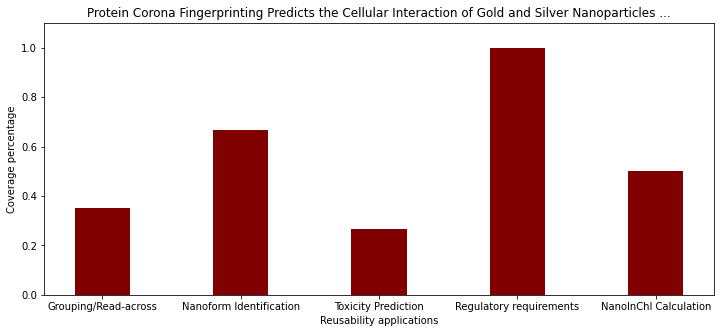

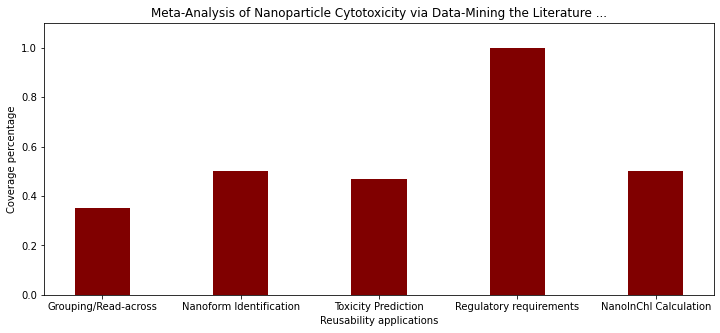

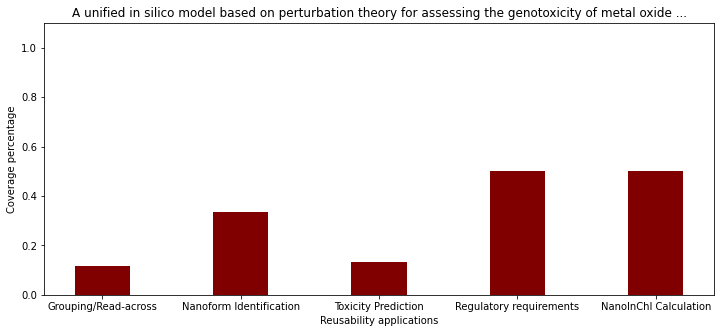

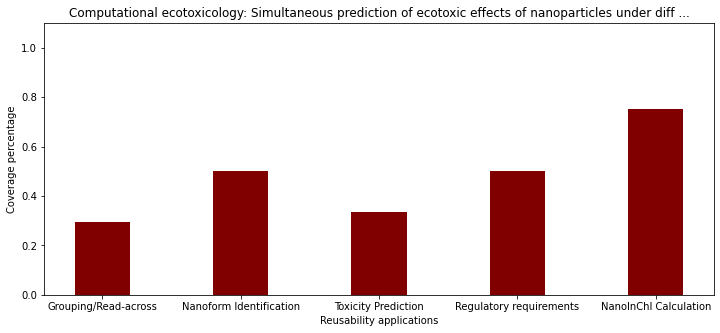

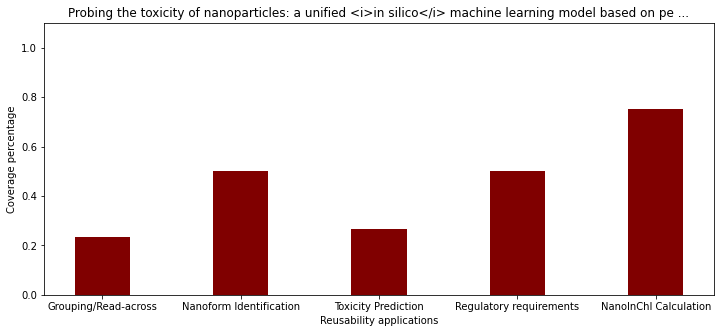

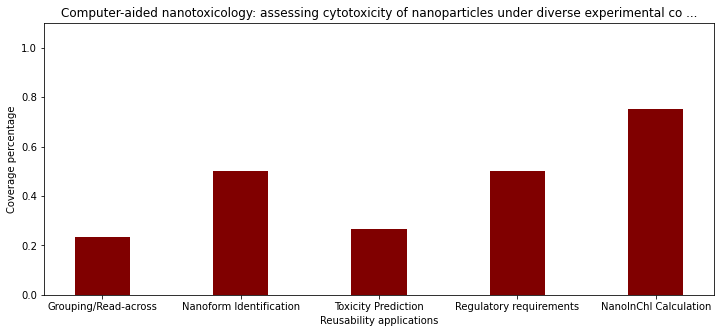

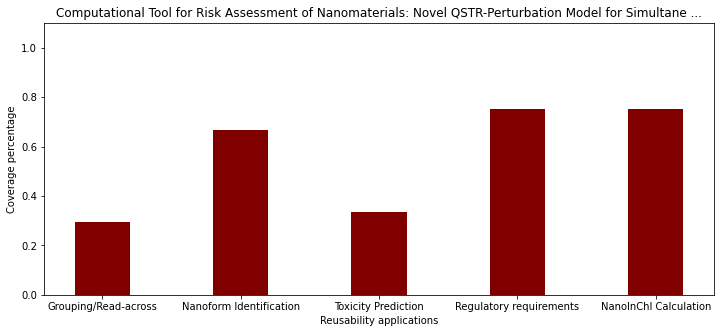

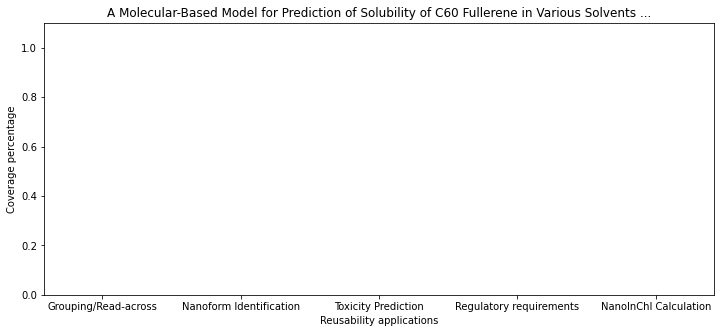

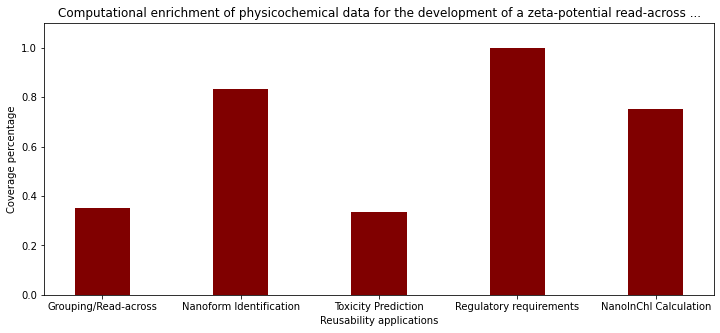

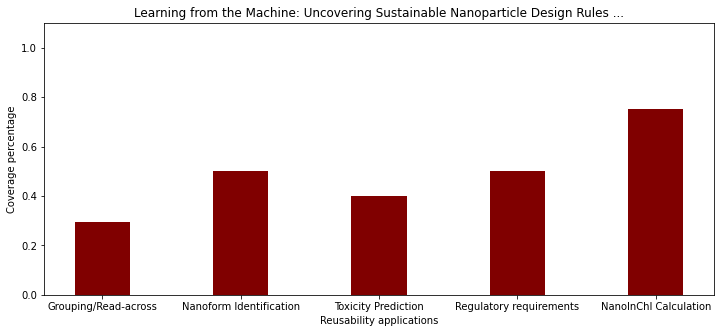

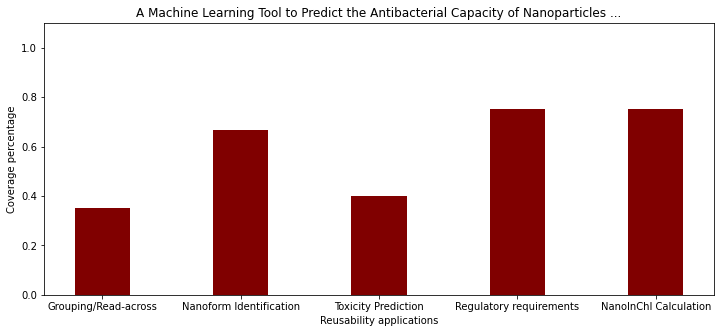

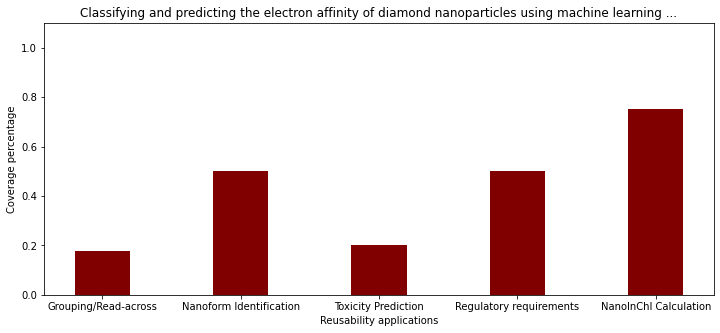

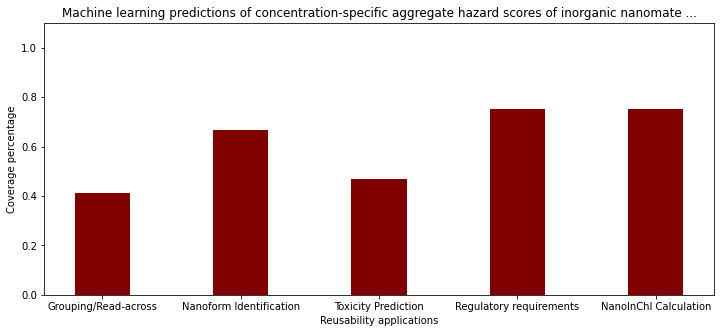

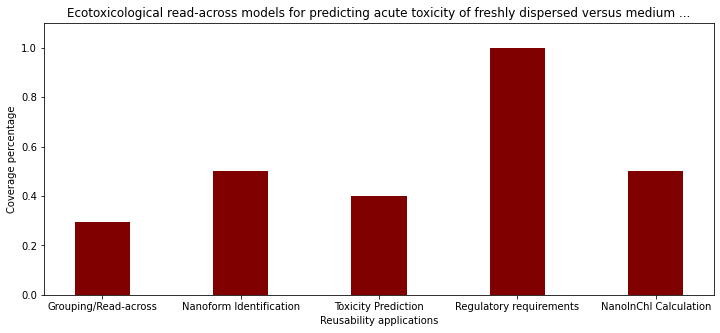

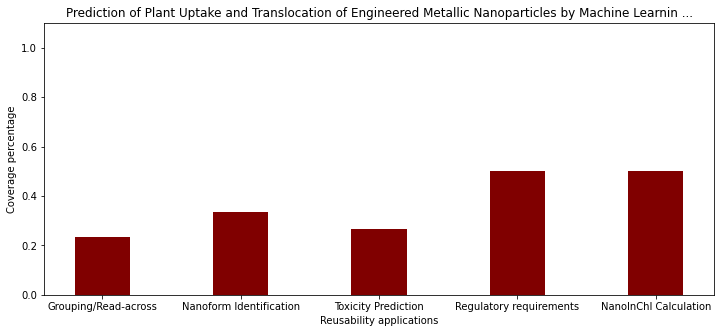

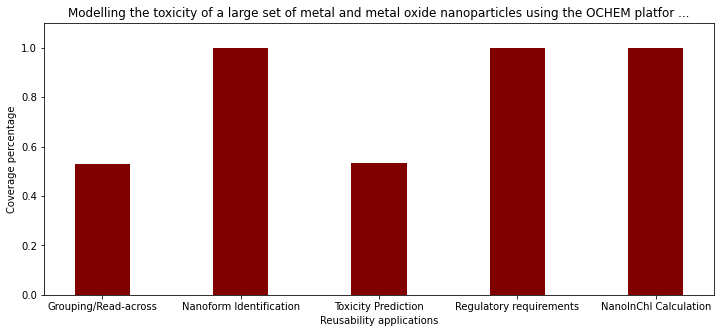

In [196]:
for i, row in dataset_mi_matrix.iterrows():
    plotDatasetApplicationAssessment(row["hash"])

In [136]:
data_list = list()

for i, row in dataset_mi_matrix.iterrows():
    
    data = applicationAssessmentByDatasetHash(row["hash"])
    
    tmp = list(data.values())
    tmp.append(row["hash"])
    
    data_list.append(tmp)   
    
    

In [140]:
data_df = pd.DataFrame(data_list, 
                  columns = ['Grouping/Read-across', 'Nanoform Identification', 'Toxicity Prediction',
                            'Regulatory requirements', 'NanoInChI Calculation', 'hash'])

In [143]:
data_df = data_df.merge(dataset_desc, on='hash')

In [150]:
applications = ['Grouping/Read-across', 'Nanoform Identification', 'Toxicity Prediction',
                            'Regulatory requirements', 'NanoInChI Calculation']

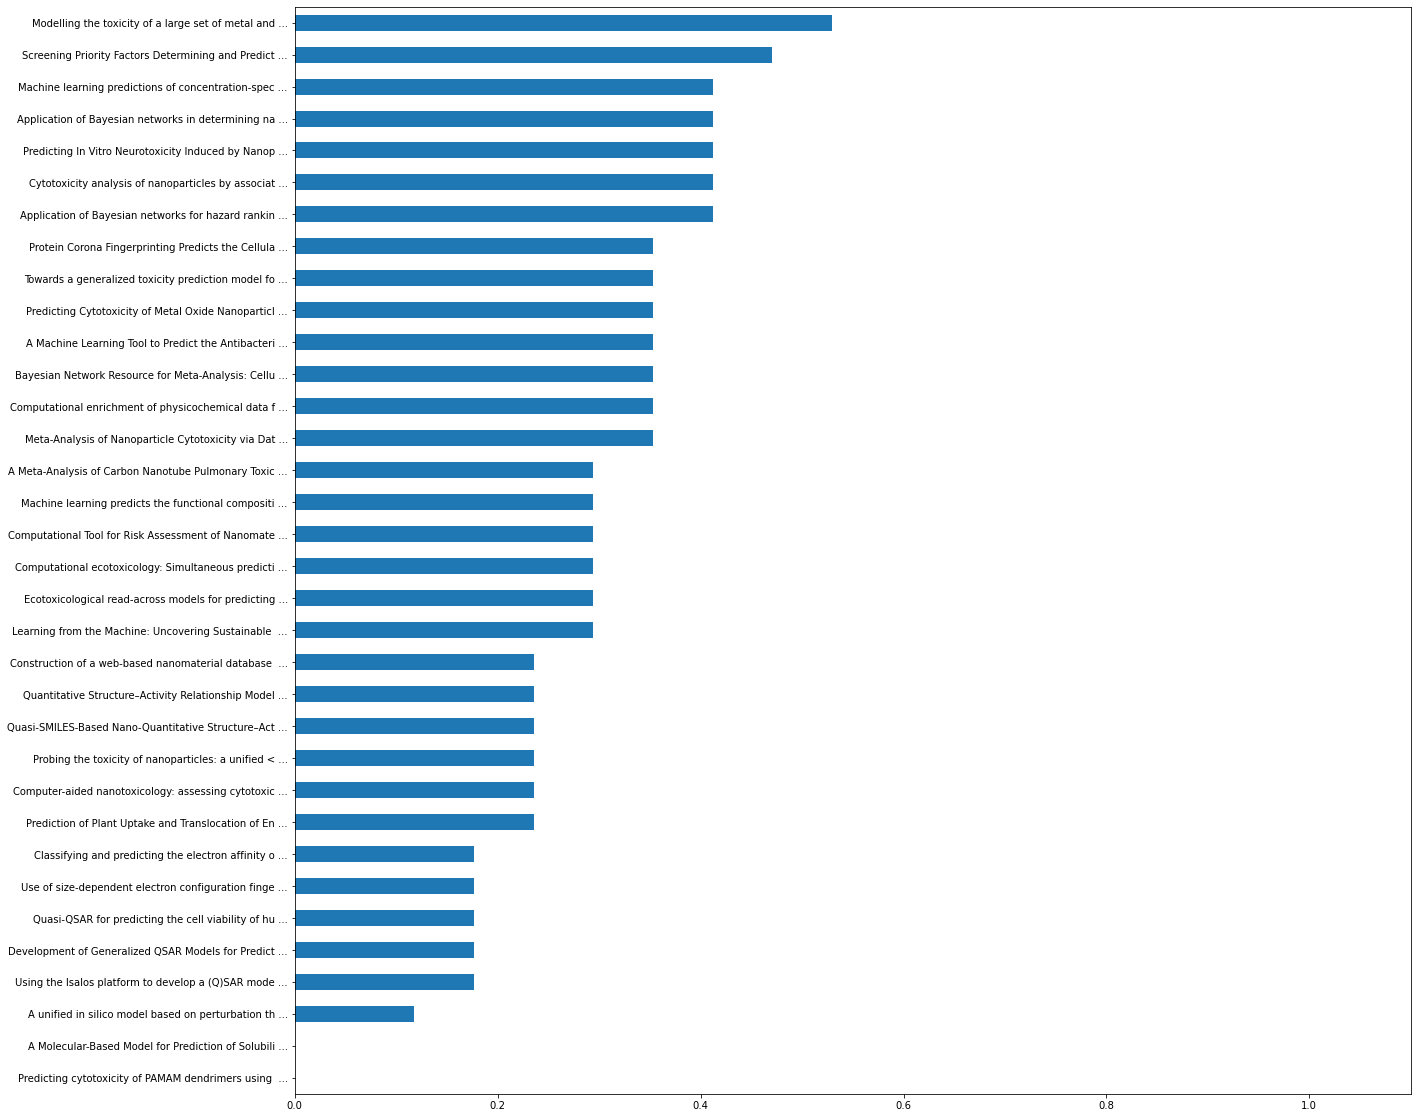

In [185]:
ax = data_df[applications[0]].sort_values().plot(kind='barh', xlim=(0.0, 1.1))
_ = ax.set_yticklabels(data_df.sort_values(applications[0])['title'].str[0:50]+" ...")


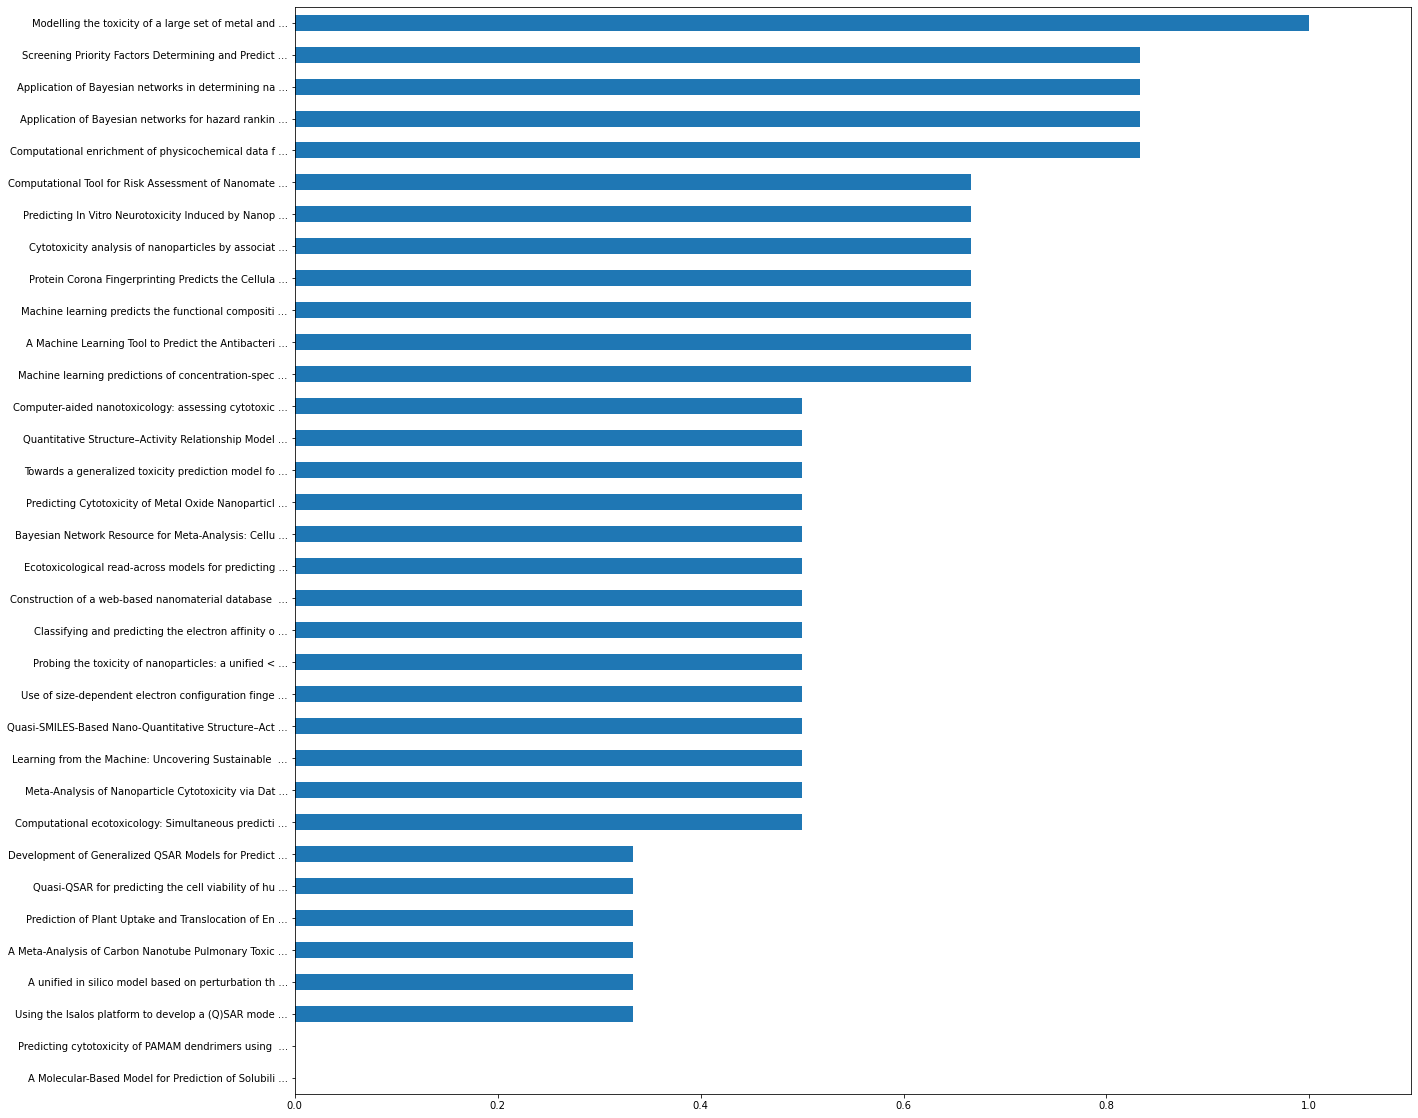

In [188]:
ax = data_df[applications[1]].sort_values().plot(kind='barh', xlim=(0.0, 1.1))
_ = ax.set_yticklabels(data_df.sort_values(applications[1])['title'].str[0:50]+" ...")

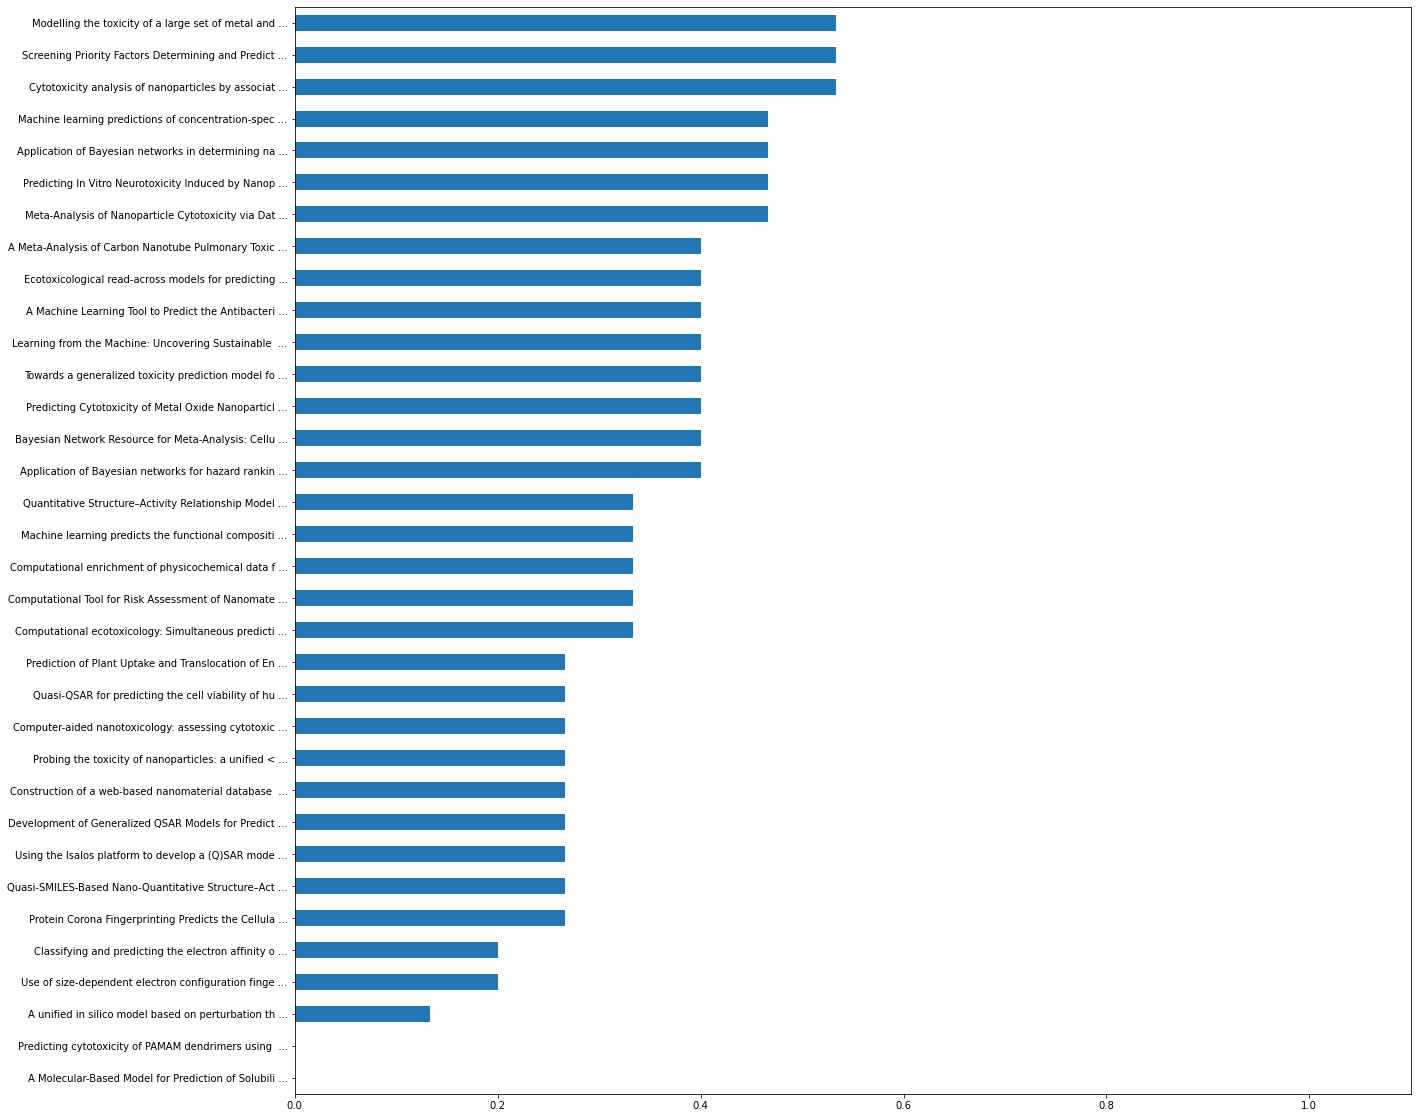

In [189]:
ax = data_df[applications[2]].sort_values().plot(kind='barh', xlim=(0.0, 1.1))
_ = ax.set_yticklabels(data_df.sort_values(applications[2])['title'].str[0:50]+" ...")

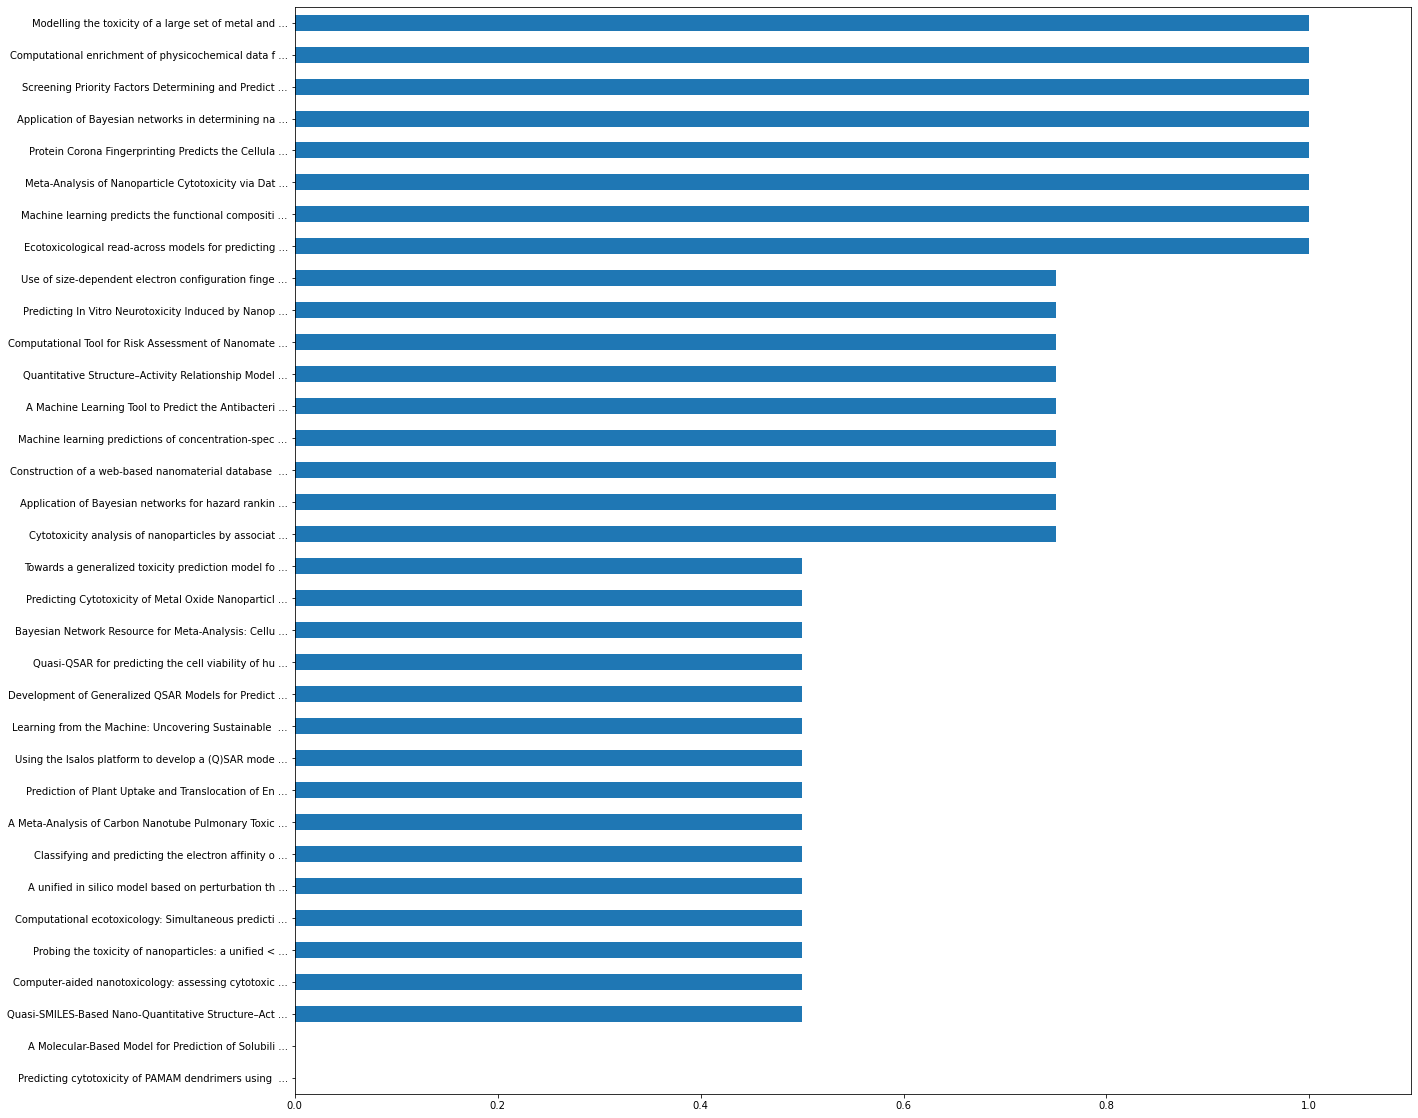

In [190]:
ax = data_df[applications[3]].sort_values().plot(kind='barh', xlim=(0.0, 1.1))
_ = ax.set_yticklabels(data_df.sort_values(applications[3])['title'].str[0:50]+" ...")

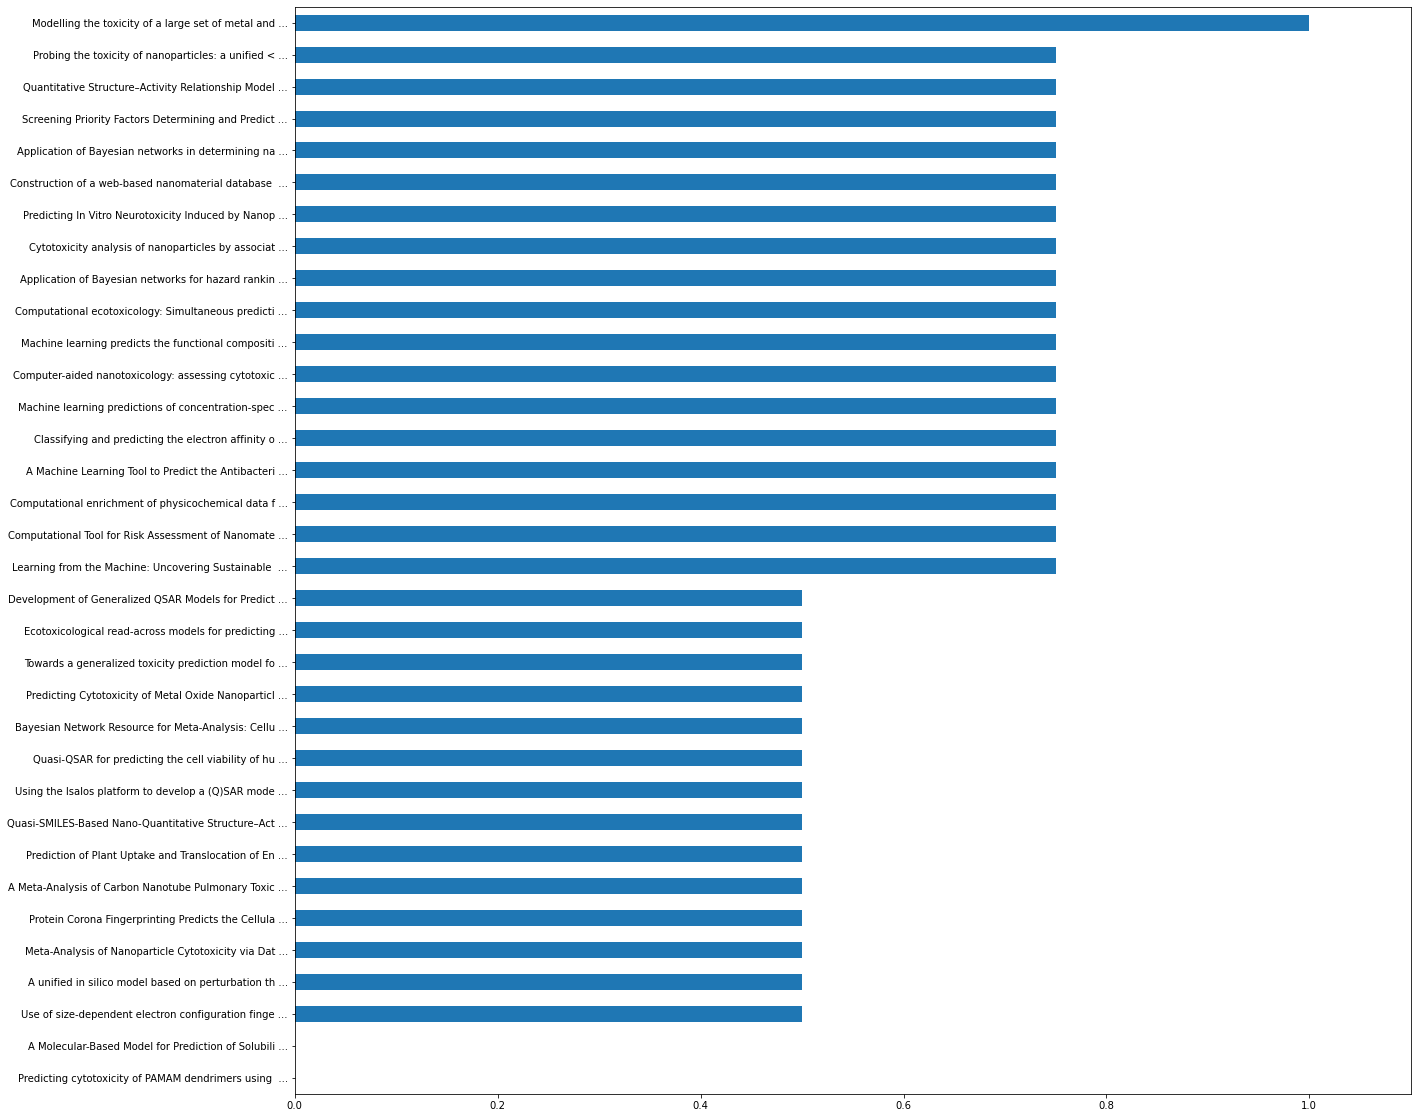

In [191]:
ax = data_df[applications[4]].sort_values().plot(kind='barh', xlim=(0.0, 1.1))
_ = ax.set_yticklabels(data_df.sort_values(applications[4])['title'].str[0:50]+" ...")

In [195]:
# generate sitemap.xml
from datetime import datetime
dateToday = datetime.today().strftime('%Y-%m-%d')

sitemap = """<?xml version="1.0" encoding="UTF-8"?>
<urlset xmlns="http://www.sitemaps.org/schemas/sitemap/0.9" xmlns:xsi="http://www.w3.org/2001/XMLSchema-instance" xsi:schemaLocation="http://www.sitemaps.org/schemas/sitemap/0.9 http://www.sitemaps.org/schemas/sitemap/0.9/sitemap.xsd">
"""

for i, row in dataset_desc.iterrows():
    sitemap = sitemap + """<url>
    <loc>overview/"""+row["hash"][0:10]+""".html</loc>
    <lastmod>"""+dateToday+"""</lastmod>
    <changefreq>yearly</changefreq>
    <priority>1.0</priority>
</url>
"""
    
sitemap = sitemap + "</urlset>"

with open('sitemap.xml', 'w') as f:
    f.write(sitemap)